In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import logging

import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker, utils, dashboard

logging.basicConfig(level=logging.INFO)

INFO:world_rowing.api:loaded most recent competition: 2021 World Rowing Cup III
INFO:world_rowing.api:loaded last race started: Men's Eight Final FA
INFO:world_rowing.dashboard:loading Men's Eight Final FA, starting at 2021-06-06 12:32:00+01:00
/mnt/c/Users/matthew/Source/rowing/world_rowing/dashboard.py:268: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.right_axes[-1].set_xticklabels(


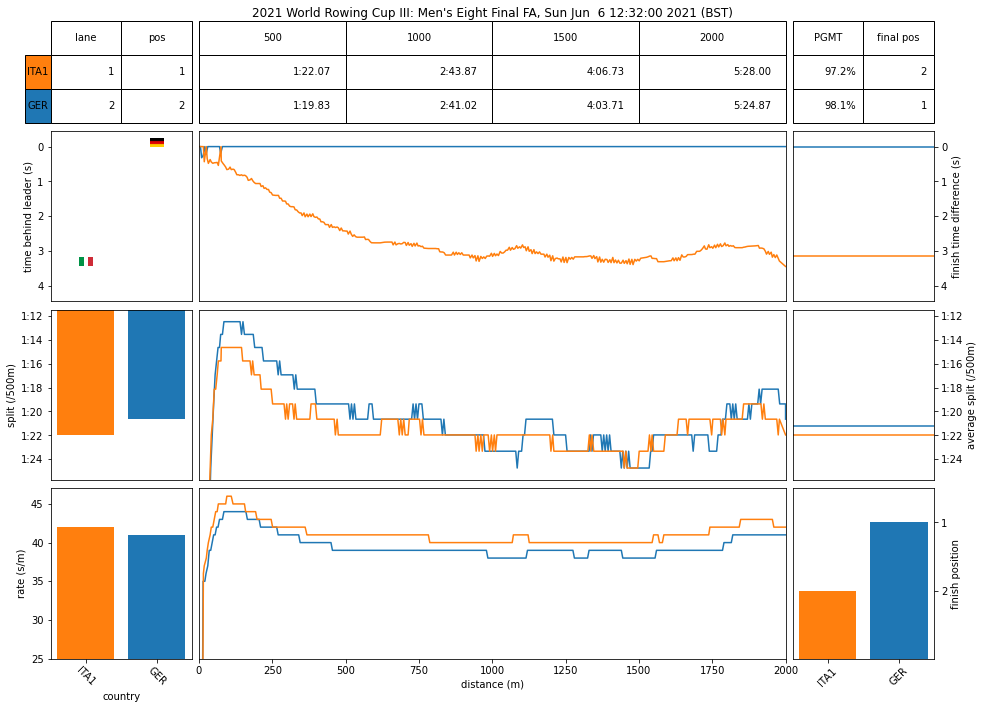

In [8]:
dash = dashboard.Dashboard.load_last_race(figsize=(14, 10))
dash.update()

INFO:world_rowing.api:loaded most recent competition: 2021 World Rowing Cup III
INFO:world_rowing.dashboard:loading Men's Quadruple Sculls Final A, starting at 2021-06-06 11:47:00+01:00


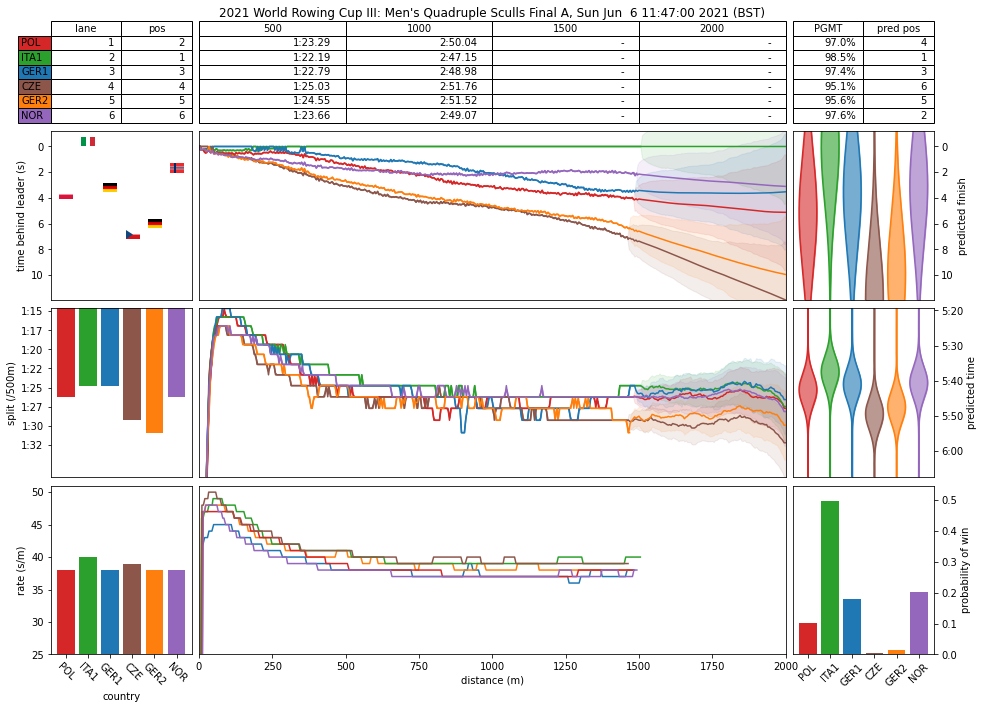

In [12]:
races = api.get_competition_races()
race = races.iloc[40]

dash = dashboard.Dashboard.from_race_id(
    race.name, figsize=(14, 10))

live_data, intermediates = dash.race_tracker.update_livedata()

dash.update(
    live_data.loc[:300],
    intermediates[[500, 1000]]
)

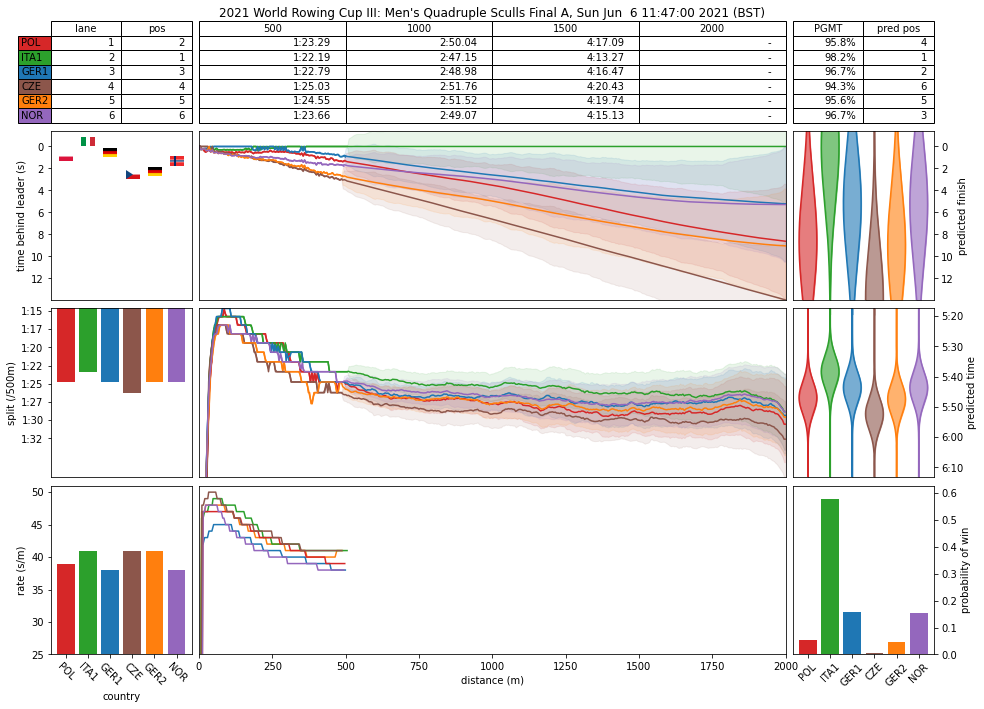

In [5]:
dash.update(
    live_data.loc[:100],
    intermediates[[500, 1000, 1500]]
)
dash.fig

In [6]:
comp_pgmts = api.get_competition_pgmts()
group_boat_pgmts = comp_pgmts.groupby('Boat')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

INFO:world_rowing.api:loaded most recent competition: 2021 World Rowing Cup III
/home/matthew/venv/concr38/lib/python3.8/site-packages/pandas/core/arrays/timedeltas.py:598: RuntimeWarning: divide by zero encountered in true_divide
  return other / self._data


,PGMT,Time,WBT,Country,Rank,Lane,Date
Boat,,,,,,,
LW2x,1.009658,6:43.79,6:47.69,NED,1,5,2021-06-06 10:17:00
W4-,0.984614,6:20.21,6:14.36,NED,1,3,2021-06-06 09:32:00
W4x,0.982353,6:13.43,6:06.84,GER,1,3,2021-06-06 10:32:00
M4x,0.981827,5:38.41,5:32.26,ITA1,1,2,2021-06-06 10:47:00
W2x,0.981521,6:44.79,6:37.31,NED,1,4,2021-06-06 09:02:00
M2x,0.981501,6:06.50,5:59.72,POL,1,3,2021-06-06 09:17:00
M8+,0.980946,5:24.87,5:18.68,GER,1,2,2021-06-06 11:32:00
W2-,0.979410,6:57.68,6:49.08,DEN,1,6,2021-06-06 08:35:00
M1x,0.979004,6:39.12,6:30.74,NOR1,1,6,2021-06-06 11:02:00


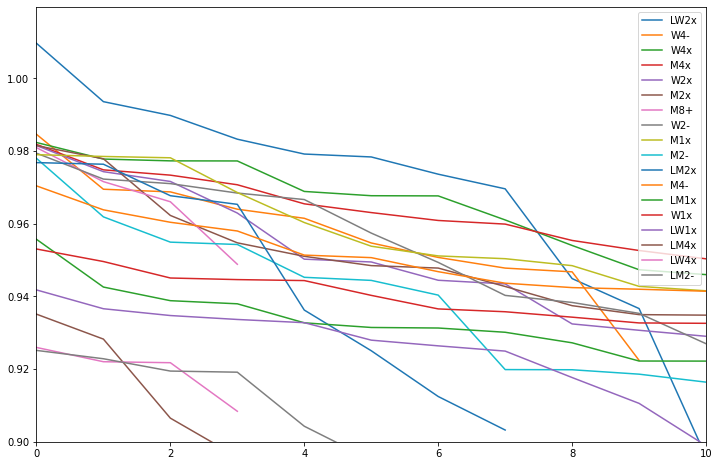

In [7]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.plot(pgmt.values, label=boat)
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();